# Titanic Notebook 

### Findings so far
* Linear regression results in a number between 0 and 1. 
* Logistic regression gives a value of 0 or 1. 
* There must be a way to categorise LR value by rounding (unsure name of this)
* If interested in turning categorical variables into numerical then can map them or encode them to numerical values so that they can be correctly evaluated.

* Used forward feature selection to determine combination of (numerical) features that when combined, and fitted to a linear regression model returns the lowest mean square error. 


In [30]:
# author Eleanor Watson
# date 30-01-2023

# Filepath
fp = r"C:\\Users\\Eleanor.E.Watson\\OneDrive - Shell\\Kubrick\\ML_work\\kaggle\\spaceship_titanic_kaggle\\spaceship-titanic\\"
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# import missingno as msno 
# haven't been able to install but want to keep note of it. 


In [31]:
## File read 

train_fp = fp + "train.csv"

df = pd.read_csv(train_fp)




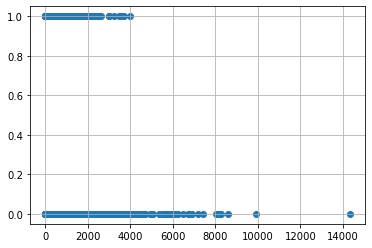

In [32]:

## Exploratory Data Analysis

fig, ax = plt.subplots()
ax.scatter(df['RoomService'], df['Transported'])
ax.grid()


<AxesSubplot:>

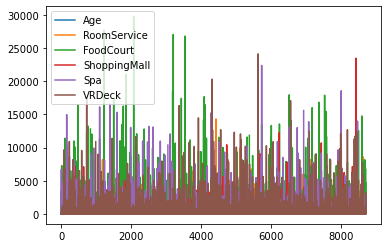

In [33]:
df.plot()

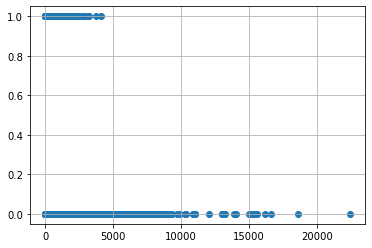

In [34]:

## Exploratory Data Analysis

fig, ax = plt.subplots()
ax.scatter(df['Spa'], df['Transported'])
ax.grid()

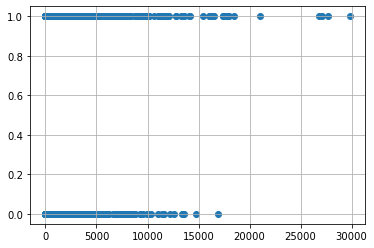

In [35]:
fig, ax = plt.subplots()
ax.scatter(df['FoodCourt'], df['Transported'])
ax.grid()

# Building Model

In [36]:
df.dropna(inplace=True)

In [37]:
X_train = df[['RoomService']] # inputs
X_train

,RoomService
0,0.0
1,109.0
2,43.0
3,0.0
4,303.0
...,...
8688,0.0
8689,0.0
8690,0.0
8691,0.0


In [38]:
y_train = df['Transported'] # labels

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train) # 'Fits' the model learning step

LogisticRegression()

# Predictions on the test set

#### Reading in the test csv

In [41]:
df_test = pd.read_csv(fp + 'test.csv')

In [42]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [43]:
#df_test.dropna(inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [45]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [46]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [47]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [48]:
df_test.fillna(0, inplace = True)

In [49]:
df_test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [50]:
df_predicted = pd.DataFrame()

In [51]:
len(df_test['PassengerId'])

4277

In [52]:
df_predicted['PassengerId'] = df_test['PassengerId']

In [53]:
X_test = df_test[['RoomService']]
X_test

,RoomService
0,0.0
1,0.0
2,0.0
3,0.0
4,10.0
...,...
4272,0.0
4273,0.0
4274,0.0
4275,0.0


In [54]:
df_predicted['Transported'] = model.predict(X_test)

In [55]:
# how to handle the NaN values? 

In [56]:
df_predicted.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [57]:
df_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [58]:
# we want output to be a boolean - to do this used logistic regression ! 
# we also want to include passenfer id in the final submission 


df_predicted.to_csv(fp + 'submission2.csv', index=False )




